In [5]:
!unzip /content/framwork.zip

Archive:  /content/framwork.zip
   creating: framwork/
   creating: framwork/.ipynb_checkpoints/
  inflating: framwork/ablationcam.py  
  inflating: framwork/basecam.py     
  inflating: framwork/eigencam.py    
  inflating: framwork/gradcam.py     
  inflating: framwork/gradcamelementwise.py  
 extracting: framwork/gradcamelmentwise  
  inflating: framwork/gradcamplusplus.py  
  inflating: framwork/hirescam.py    
  inflating: framwork/layercam.py    
  inflating: framwork/respondcam.py  
  inflating: framwork/scorecam.py    
  inflating: framwork/smoothgradcamplusplus.py  
  inflating: framwork/xgradcam.py    
   creating: framwork/__pycache__/
  inflating: framwork/__pycache__/ablationcam.cpython-310.pyc  
  inflating: framwork/__pycache__/basecam.cpython-310.pyc  
  inflating: framwork/__pycache__/eigencam.cpython-310.pyc  
  inflating: framwork/__pycache__/gradcam.cpython-310.pyc  
  inflating: framwork/__pycache__/gradcamelementwise.cpython-310.pyc  
  inflating: framwork/__pycac

In [1]:
!zip -r /content/visioncam.zip /content/visioncam

  adding: content/visioncam/ (stored 0%)
  adding: content/visioncam/ablationcam.py (deflated 73%)
  adding: content/visioncam/.ipynb_checkpoints/ (stored 0%)
  adding: content/visioncam/respondcam.py (deflated 60%)
  adding: content/visioncam/gradcam.py (deflated 58%)
  adding: content/visioncam/gradcamelementwise.py (deflated 58%)
  adding: content/visioncam/smoothgradcamplusplus.py (deflated 66%)
  adding: content/visioncam/gradcamplusplus.py (deflated 66%)
  adding: content/visioncam/__pycache__/ (stored 0%)
  adding: content/visioncam/__pycache__/hirescam.cpython-310.pyc (deflated 38%)
  adding: content/visioncam/__pycache__/ablationcam.cpython-310.pyc (deflated 45%)
  adding: content/visioncam/__pycache__/basecam.cpython-310.pyc (deflated 44%)
  adding: content/visioncam/__pycache__/base.cpython-310.pyc (deflated 42%)
  adding: content/visioncam/__pycache__/scorecam.cpython-310.pyc (deflated 43%)
  adding: content/visioncam/__pycache__/xgradcam.cpython-310.pyc (deflated 39%)
  ad

In [33]:
from visioncam.ablationcam import AblationCAM

from tensorflow.keras.applications import ResNet50, imagenet_utils
from keras.applications import Xception
import tensorflow as tf
import numpy as np


class_index = {'tiger_cat': 282, 'beagle': 162 ,'african_elephant' : 386 , 'bird' : 10}

model = Xception(weights="imagenet")

image = AblationCAM.get_img_array(img_path = '/content/bird.png',target_size = (299,299,3) )

preds = model.predict(image)
class_idx = np.argmax(preds[0])

#grad_cam = XgradCAM(model , class_index['bird'] )

last_conv_l_name = "block14_sepconv2_act"
classifier_l_names = [
    "avg_pool",
    "predictions",
]

grad_cam = AblationCAM(model,last_conv_layer_name = last_conv_l_name, classifier_layer_names = classifier_l_names )


1/1 [==============================] - 1s 1s/step


In [ ]:
import keras
preprocess_input = keras.applications.xception.preprocess_input
img_array = preprocess_input(image)
grad_heatmap = grad_cam.compute_cam_features(img_array)

1/1 [==============================] - ETA: 0s

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(grad_heatmap)

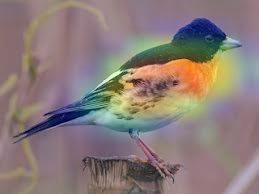

In [32]:
AblationCAM.save_and_display_gradcam('/content/bird.png', grad_heatmap)